In [28]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import kurtosis, skew

%matplotlib inline
import seaborn as sns

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style("whitegrid")
sns.set_context("paper")

In [29]:
df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/Titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: xlabel='Fare'>

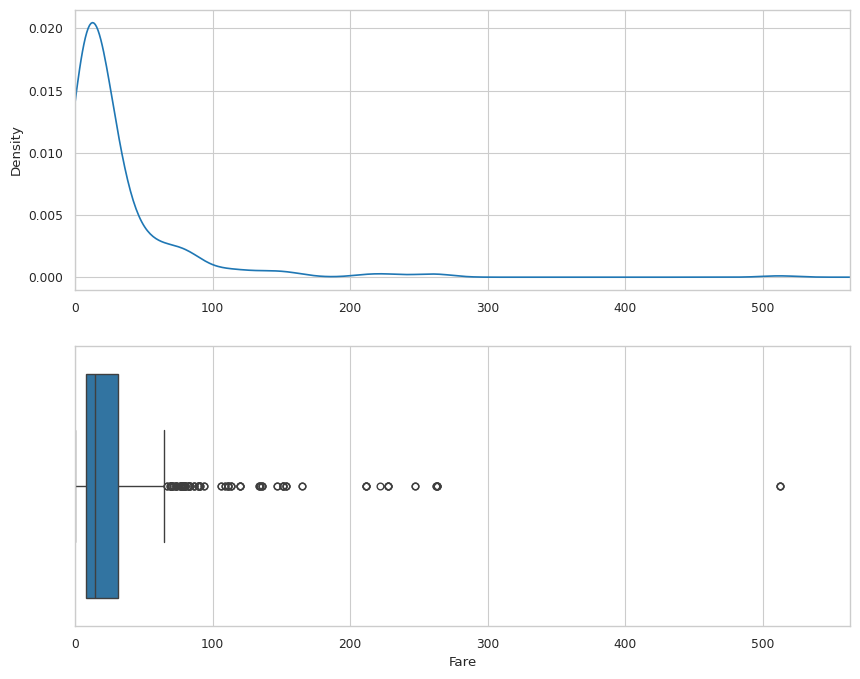

In [30]:
i = 'Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

In [31]:
kurtosis_before_value = kurtosis(df[i])
print("kurtosis_before_value = ", kurtosis_before_value)
skew_before_value = skew(df[i])
print("skew_before_value = ", skew_before_value)

kurtosis_before_value =  33.20428925264474
skew_before_value =  4.7792532923723545


In [34]:
# input column
target_col = 'Fare'
log_col = 'Log_' + target_col

# Step 1: Custom Transformer to replace zeros with NaN
class ZeroToNaN(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X.loc[X[self.column] == 0, self.column] = np.nan
        return X

# Step 2: Custom Transformer for log transform
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, input_col, output_col):
        self.input_col = input_col
        self.output_col = output_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.output_col] = np.log(X[self.input_col])
        return X

# Step 2: Custom Transformer for Drop Missing Rows
class DropMissingRows(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.dropna()

# Step 3: Build numeric pipeline
pipeline = Pipeline(steps=[
    ('zero_to_nan', ZeroToNaN(column=target_col)),
    ('drop_na', DropMissingRows()),
    ('log', LogTransformer(input_col=target_col, output_col=log_col))
])

# Apply pipeline
df_transformed = pipeline.fit_transform(df)

<Axes: xlabel='Log_Fare'>

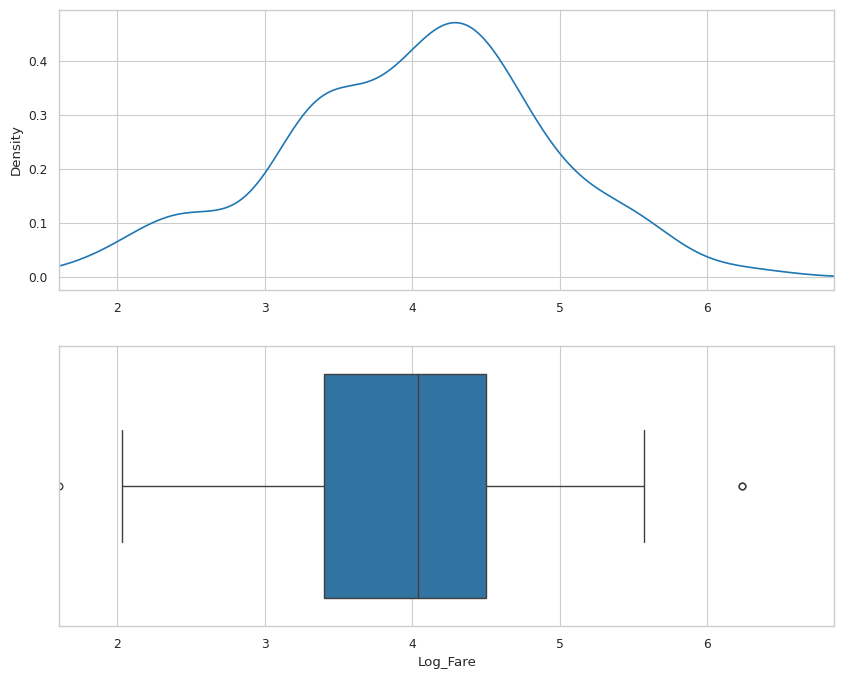

In [35]:
i = 'Log_Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df_transformed[i].min(), df_transformed[i].max()*1.1)

ax = df_transformed[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df_transformed[i].min(), df_transformed[i].max()*1.1)
sns.boxplot(x=df_transformed[i])

In [36]:
print("kurtosis_before_value = ", kurtosis_before_value)
print("skew_before_value = ", skew_before_value)
print("------")
kurtosis_after_value = kurtosis(df_transformed[i])
print("kurtosis_after_value = ", kurtosis_after_value)
skew_after_value = skew(df_transformed[i])
print("skew_after_value = ", skew_after_value)

kurtosis_before_value =  33.20428925264474
skew_before_value =  4.7792532923723545
------
kurtosis_after_value =  -0.0873951312096577
skew_after_value =  -0.20488637135036583
